Below is a simulation of the popular school yard gambling game of CeeLow.  The game has a few rule variations, but the rule set chosen here goes as follows:
    
    1. All parties submit a fee to the pot.
    2. Each party takes a turn which consists of rolling three dice at once.  The hierarchy of rolls are as such.  Failure to result in one of these combinations prompts a re-roll.
            a. [4,5,6]
            b. triples
            c. doubles(rank determined by lone die)
            d. [1,2,3]
    3.  Highest score after all parties take a turn takes the whole pot.
    4.  Ties results in all parties submitting an additional fee before tie breaker round.

In [7]:
import random
import matplotlib.pyplot as plt

In [8]:
def dice_roll_list(n):
    roll_list = []
    for i in range(n):
        roll_list.append(random.randint(1,6))
    roll_list.sort() #sort dice to push lone die occurences to first or last position
    return roll_list

In [9]:
def get_roll_score():
    roll_list = dice_roll_list(3)
    roll_set = set(roll_list) #Unique dice values to filter combinations
    if len(roll_set) == 3: #No duplicates, check for winner/loser/re-roll
        if roll_set == {1,2,3}:#loser
            score = 0
        elif roll_set == {4,5,6}: #max score
            score = 20
        else:
            return get_roll_score() #not a valid combination; prompt re-roll

    elif len(roll_set) == 2: #Rolled Double
        if roll_list.count(roll_list[0]) == 2:
            score = roll_list[-1]
        else:
            score = roll_list[0]

    else: #Rolled Triple
        score = 10 + roll_list[0]
    return score

In [10]:
def play_round(pot, list_of_player_names):
    round_score_dict = {} #how scores for round
    for name in list_of_player_names: #everyone takes their turn
        round_score_dict[name] = get_roll_score()
        
    winner = [key for key, value in round_score_dict.items() if value == max(round_score_dict.values())] #find winner/winners
    if len(winner)>1: #look for a tie
        pot += 1
        return play_round(pot = pot, list_of_player_names = winner) #tie breaker recurser
    return winner[0],pot
        

In [11]:
players = ['Me','the_mark','Professor_Lawrence']

def play_session(rounds, pot, players):
    '''
    Bundles up multple rounds of CeeLow to simulate a session.
    '''
    players_cash = {} 
    for player in players:
        players_cash[player] = 0 #start everyone at 0 to measure gain/loss

    for i in range(rounds): 
        winner,pot = play_round(pot, players)
        winnings = len(players)*pot - pot 
        for player in players:
            if player == winner:
                players_cash[player] += winnings #pay the winner
            else:
                players_cash[player] -= pot #tax the losers
    return players_cash
    

(array([ 16.,  46., 160., 205., 272., 143.,  90.,  43.,  20.,   5.]),
 array([-75. , -57.5, -40. , -22.5,  -5. ,  12.5,  30. ,  47.5,  65. ,
         82.5, 100. ]),
 <BarContainer object of 10 artists>)

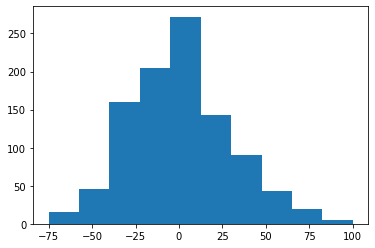

In [12]:
end_of_session_cash = []
for i in range(1000):
    end_of_session_cash.append(play_session(10, 5, players)['Me'])
plt.hist(end_of_session_cash)

(array([  8.,  58., 160., 323., 286., 125.,  29.,  10.,   0.,   1.]),
 array([-715., -532., -349., -166.,   17.,  200.,  383.,  566.,  749.,
         932., 1115.]),
 <BarContainer object of 10 artists>)

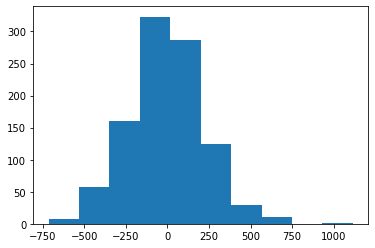

In [13]:
end_of_session_cash = []
for i in range(1000):
    end_of_session_cash.append(play_session(100, 5, players)['Me'])
plt.hist(end_of_session_cash)

(array([  9.,  42.,  99., 187., 263., 216., 126.,  41.,  15.,   2.]),
 array([-15722. , -12320.4,  -8918.8,  -5517.2,  -2115.6,   1286. ,
          4687.6,   8089.2,  11490.8,  14892.4,  18294. ]),
 <BarContainer object of 10 artists>)

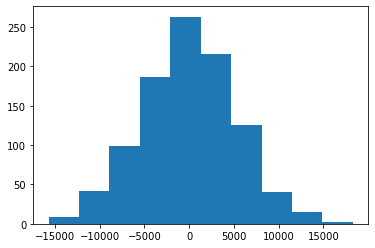

In [14]:
end_of_session_cash = []
for i in range(1000):
    end_of_session_cash.append(play_session(1000, 5, players)['Me'])
plt.hist(end_of_session_cash)